In [1]:
from distributions_sampling_Copy2 import *
# from plots_utils import *
from fits_util import *
import timeit
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import timeit
import multiprocessing
from joblib import Parallel, delayed
# from distributions_sampling import precompute_pdfs, generate_sample_multivariate
from fits_util import perform_fit


Generating samples...


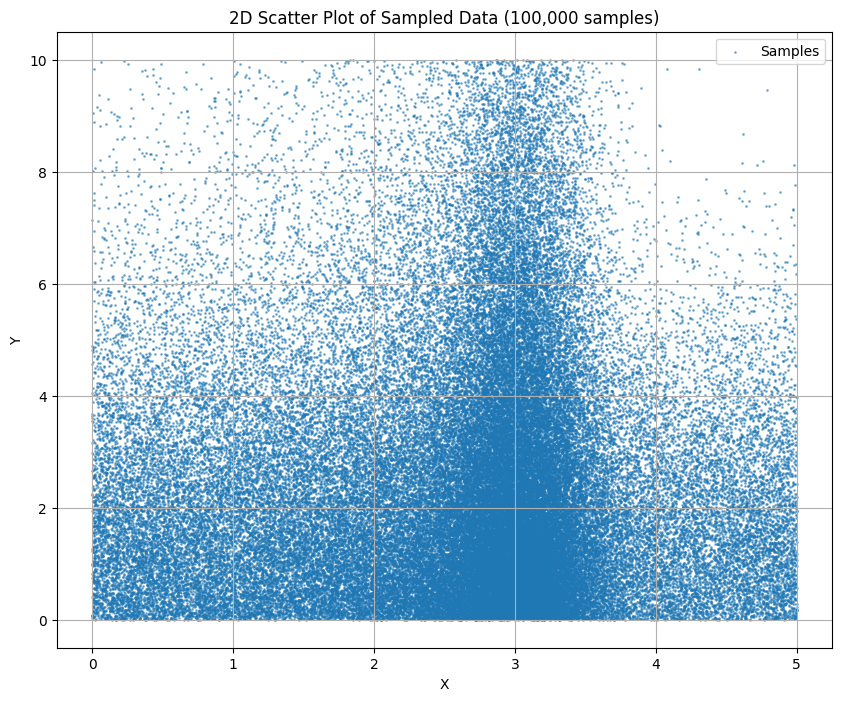


Fitting the model to the data...
Fit converged successfully.
Fitted parameters: {'mu': 3.001597238154063, 'sigma': 0.3000762897403728, 'beta': 1.0094210436607458, 'm': 1.3932047575615454, 'lambda_s': 0.29914478283839707, 'mu_b': -0.028001758842933832, 'sigma_b': 2.5085476515787266, 'f_signal': 0.5983364041785127, 'N_expected': 100000.11705981503}
Uncertainties: {'mu': 0.0035970819524300257, 'sigma': 0.0034388760989403355, 'beta': 0.03170603198560584, 'm': 0.08914606530635438, 'lambda_s': 0.002913157768814012, 'mu_b': 0.10317695658289248, 'sigma_b': 0.047790579207673156, 'f_signal': 0.00501800332076735, 'N_expected': 446.6183282182974}

Fit Results:
mu: 3.0016 ± 0.0036
sigma: 0.3001 ± 0.0034
beta: 1.0094 ± 0.0317
m: 1.3932 ± 0.0891
lambda_s: 0.2991 ± 0.0029
mu_b: -0.0280 ± 0.1032
sigma_b: 2.5085 ± 0.0478
f_signal: 0.5983 ± 0.0050
N_expected: 100000.1171 ± 446.6183
Generating fitted PDF for visualization...


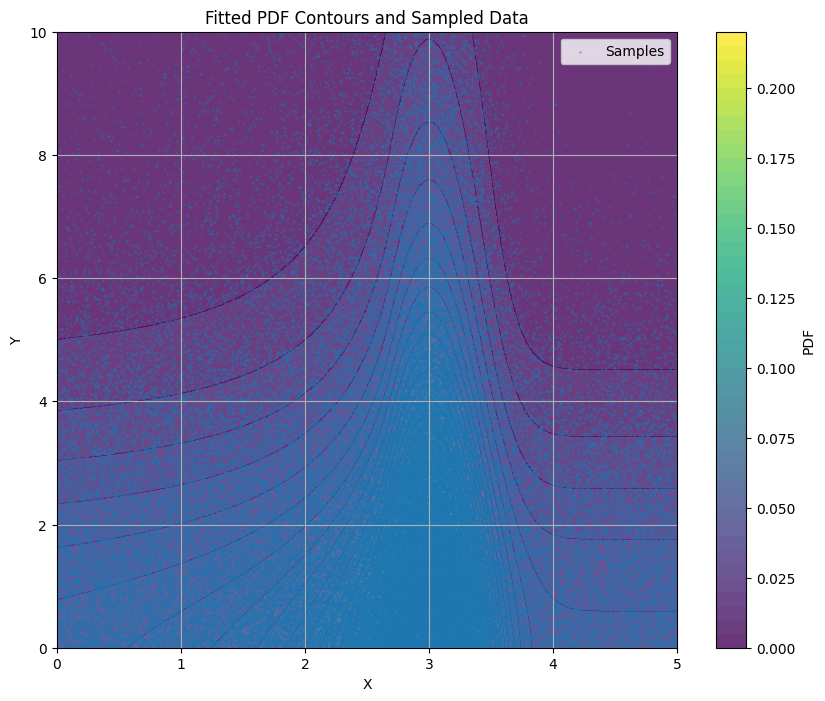

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define model parameters
params = [3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6]  # mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal
size = 100000  # Number of samples

# Generate samples
print("Generating samples...")
x_samples, y_samples = sample_componentwise(size, params)

# Plot the sampled data
plt.figure(figsize=(10, 8))
plt.scatter(x_samples, y_samples, alpha=0.5, s=1, label="Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Scatter Plot of Sampled Data (100,000 samples)")
plt.legend()
plt.grid(True)
plt.show()

bounds = {
    "mu": (2.9, 3.1), 
    "sigma": (0.05, 0.5),
    "beta": (0.8, 1.2),
    "m": (1.0, 2.0),
    "lambda_s": (0.1, 1.0),
    "mu_b": (-0.05, 0.5),
    "sigma_b": (1.5, 4.5),
    "f_signal": (0.4, 0.8),
    "N_expected": (95000, 105000),
}

# Define initial guesses
initial_guess = {
    "mu": 3.1,
    "sigma": 0.4,
    "beta": 1.1,
    "m": 1.3,
    "lambda_s": 0.4,
    "mu_b": 0.1,
    "sigma_b": 2.4,
    "f_signal": 0.7,
    "N_expected": size,
}

# Perform the fit
print("\nFitting the model to the data...")
fit_results = perform_fit(x_samples, y_samples, bounds, initial_guess)

# Display the fit results
if fit_results["converged"]:
    print("\nFit Results:")
    for param, value in fit_results["parameters"].items():
        uncertainty = fit_results["uncertainties"][param]
        print(f"{param}: {value:.4f} ± {uncertainty:.4f}")
else:
    print("The fit did not converge. Check the diagnostics.")

# Extract fitted parameters for visualization
fitted_params = list(fit_results["parameters"].values())[:-1]  # Exclude N_expected

# Generate the fitted PDF for visualization
print("Generating fitted PDF for visualization...")
x_grid = np.linspace(0, 5, 100)
y_grid = np.linspace(0, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
g_s_norm_fitted = crystal_ball_normalization_truncated(
    fitted_params[0], fitted_params[1], fitted_params[2], fitted_params[3], lower=0, upper=5
)
fitted_pdf = f_xy_vectorized(
    x_mesh, y_mesh, *fitted_params, g_s_norm_fitted
)

# Visualize the fitted PDF
plt.figure(figsize=(10, 8))
plt.contourf(x_mesh, y_mesh, fitted_pdf, levels=50, cmap="viridis", alpha=0.8)
plt.colorbar(label="PDF")
plt.scatter(x_samples, y_samples, alpha=0.3, s=1, label="Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitted PDF Contours and Sampled Data")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Precompute PDFs
true_params = [3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6]  # True parameters
precomputed_pdfs = precompute_pdfs(true_params)

Generating 100000 samples...


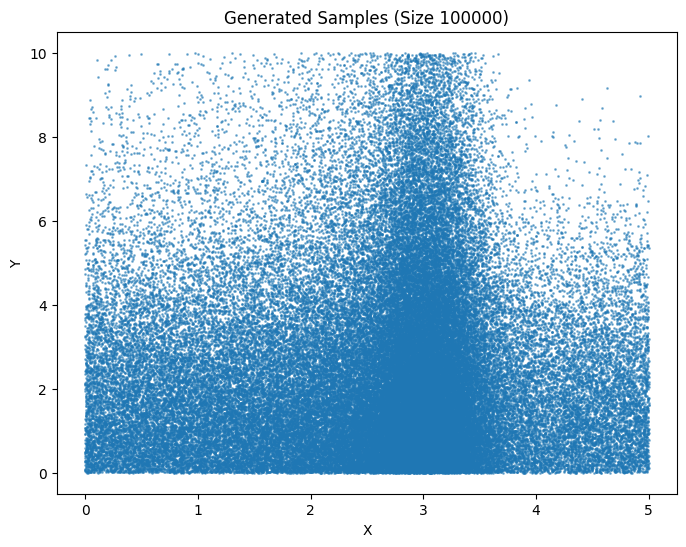

Fit converged successfully.
Fitted parameters:
<ValueView mu=3.001464292519668 sigma=0.29717251821568397 beta=1.006317182085956 m=1.3732774113529267 lambda_s=0.29901607428180765 mu_b=0.05501059299697582 sigma_b=2.491411220465964 f_signal=0.5966304136457105 N_expected=100000.11585462338>
Parameter uncertainties:
<ErrorView mu=0.003715533277835581 sigma=0.0035137691678781002 beta=0.0326394272379672 m=0.08832940163293168 lambda_s=0.0029276100071456146 mu_b=0.12983736479499583 sigma_b=0.06519778916352359 f_signal=0.005097910945797424 N_expected=446.72112633675715>
Covariance matrix:
┌────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│            │         mu      sigma       beta          m   lambda_s       mu_b    sigma_b   f_signal N_expected │
├────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│         mu │   1.38e-05  -0.007e-3  -0.066e-3   0.121e-3      -0

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7.301e+05                 │              Nfcn = 607              │
│ EDM = 0.000231 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu         │   3.001   │   0.004   │            │            │   2.9   │   3.1   │       │
│ 1 │ sigma      │  0.2972   │  0.0035   │            │            │  0.05   │   0.5   │       │
│ 2 │ beta       │   1.006   │   0.033   │            │            │   0.8   │   1.2   │       │
│ 3 │ m          │   1.37    │   0.09    │            │            │    1    │    2    │       │
│ 4 │ lambda_s   │  0.2990   │  0.0029   │            │            │   0.1   │    1    │       │
│ 5 │ mu_b       │   0.06    │   0.13    │            │            │  -0.05  │   0.5   │       │
│ 6 │ sigma_b    │   2.49    │   0.07    │            │            │   1.5   │   4.5   │       │
│ 7 │ f_signal   │   0.597   │   0.005   │            │            │   0.4   │   0.8   │       │
│ 8 │ N_expected │  100.0e3  │   0.4e3   │            │            │  95000  │ 105000  │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│            │         mu      sigma       beta          m   lambda_s       mu_b    sigma_b   f_signal N_expected │
├────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│         mu │   1.38e-05  -0.007e-3  -0.066e-3   0.121e-3      -0e-6  -0.011e-3   0.006e-3  -0.001e-3         -0 │
│      sigma │  -0.007e-3   1.23e-05   0.055e-3  -0.114e-3       1e-6   0.053e-3  -0.029e-3   0.006e-3          0 │
│       beta │  -0.066e-3   0.055e-3    0.00107    -0.0025       2e-6     0.0003    -0.0002   0.019e-3     0.0000 │
│          m │   0.121e-3  -0.114e-3    -0.0025    0.00789     -25e-6     -0.002      0.001  -0.171e-3     -0.000 │
│   lambda_s │      -0e-6       1e-6       2e-6     -25e-6   8.57e-06      34e-6       1e-6       4e-6      -0e-6 │
│       mu_b │  -0.011e-3   0.053e-3     0.0003     -0.002      34e-6     0.0194     -0.009   0.166e-3     -0.000 │
│    sigma_b │   0.006e-3  -0.029e-3    -0.0002      0.001       1e-6     -0.009    0.00425  -0.088e-3      0.000 │
│   f_signal │  -0.001e-3   0.006e-3   0.019e-3  -0.171e-3       4e-6   0.166e-3  -0.088e-3    2.6e-05          0 │
│ N_expected │         -0          0     0.0000     -0.000      -0e-6     -0.000      0.000          0      2e+05 │
└────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [11]:

import numpy as np

# Assume these are predefined functions
# from distributions_sampling import generate_sample_multivariate, crystal_ball_normalization_truncated

# Example parameters and bounds
true_parameters = {
    "mu": 3.0,
    "sigma": 0.3,
    "beta": 1.0,
    "m": 1.4,
    "lambda_s": 0.3,
    "mu_b": 0.0,
    "sigma_b": 2.5,
    "f_signal": 0.6,
    "N_expected": 100000,
}

bounds = {
    "mu": (2.9, 3.1), 
    "sigma": (0.05, 0.5),
    "beta": (0.8, 1.2),
    "m": (1.0, 2.0),
    "lambda_s": (0.1, 1.0),
    "mu_b": (-0.05, 0.5),
    "sigma_b": (1.5, 4.5),
    "f_signal": (0.4, 0.8),
    "N_expected": (95000, 105000),
}

# Generate 100,000 samples
sample_size = 100000
print(f"Generating {sample_size} samples...")

x_samples, y_samples = generate_sample_multivariate(sample_size, precomputed_pdfs)

# Visualize the generated samples to confirm they look correct
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x_samples, y_samples, alpha=0.5, s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Generated Samples (Size {sample_size})")
plt.show()
# Define initial guesses
initial_guess = {
    "mu": 3.1,
    "sigma": 0.4,
    "beta": 1.1,
    "m": 1.3,
    "lambda_s": 0.4,
    "mu_b": 0.1,
    "sigma_b": 2.4,
    "f_signal": 0.7,
    "N_expected": sample_size,
}

# Define extended negative log-likelihood function
def extended_negative_log_likelihood(mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, N_expected):
    try:
        # Precompute normalization constant for signal PDF
        g_s_norm = crystal_ball_normalization_truncated(mu, sigma, beta, m, lower=0, upper=5)

        # Evaluate joint PDF
        pdf_vals = f_xy_vectorized(
            x_samples, y_samples, mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal, g_s_norm
        )

        # Avoid log(0)
        pdf_vals += 1e-16

        # Observed sample size
        N_observed = len(x_samples)

        # Extended likelihood terms
        log_likelihood = (
            -N_expected
            + N_observed * np.log(N_expected)
            + np.sum(np.log(pdf_vals))
        )

        return -log_likelihood
    except Exception as e:
        print(f"Error in likelihood calculation: {e}")
        return 1e10


# Initialize Minuit with the initial guesses
m = Minuit(extended_negative_log_likelihood, **initial_guess)

# Set parameter bounds
for param, bound in bounds.items():
    m.limits[param] = bound



# Perform the fit
m.migrad()  # Minimize negative log-likelihood
m.hesse()   # Compute uncertainties

# Display results
if m.valid:
    print("Fit converged successfully.")
    print("Fitted parameters:")
    print(m.values)
    print("Parameter uncertainties:")
    print(m.errors)
    print("Covariance matrix:")
    print(m.covariance)
else:
    print("Fit did not converge. Check Minuit diagnostics:")
    print(m.fmin)
m

In [3]:
def time_benchmark(precomputed_pdfs, bounds, initial_guess, size=100000, n_calls=10):
    """
    Benchmark execution times for:
    1. np.random.normal
    2. Parallel sample generation using the joint PDF
    3. Maximum likelihood fitting using generated samples

    Parameters:
    - precomputed_pdfs: Precomputed marginal and conditional PDFs.
    - bounds: Bounds for parameter fitting (used to generate initial guesses).
    - initial_guess: Initial parameter guesses for the fit.
    - size: Number of events to generate.
    - n_calls: Number of calls to average for benchmarking.
    
    Returns:
    - normal_time: Time taken for np.random.normal.
    - sample_time: Time taken for sample generation.
    - fit_time: Time taken for maximum likelihood fitting.
    - sample_relative: Relative time for sample generation compared to np.random.normal.
    - fit_relative: Relative time for fitting compared to np.random.normal.
    """
    # Automatically determine the number of CPUs
    n_jobs = multiprocessing.cpu_count()
    
    # 1. Benchmark np.random.normal
    normal_time = timeit.timeit(
        stmt="np.random.normal(size=size)",
        setup="import numpy as np",
        globals={"size": size},
        number=n_calls
    ) / n_calls

    # 2. Benchmark parallel sample generation
    def generate_samples():
        return parallel_generate_samples_multivariate(size, precomputed_pdfs, n_jobs=n_jobs)

    sample_time = timeit.timeit(
        stmt="generate_samples()",
        globals={"generate_samples": generate_samples},
        number=n_calls
    ) / n_calls

    # Generate a single sample for fitting
    sample = parallel_generate_samples_multivariate(size, precomputed_pdfs, n_jobs=n_jobs)

    # 3. Benchmark maximum likelihood fitting
    fit_time = timeit.timeit(
        stmt="perform_fit(sample, bounds, initial_guess)",
        globals={"perform_fit": perform_fit, "sample": sample, "bounds": bounds, "initial_guess": initial_guess},
        number=n_calls
    ) / n_calls

    # Compute relative times
    sample_relative = sample_time / normal_time
    fit_relative = fit_time / normal_time

    return normal_time, sample_time, fit_time, sample_relative, fit_relative


# Define bounds for the parameters
bounds = {
    "mu": (2.9, 3.1),           # mu
    "sigma": (0.05, 0.5),       # sigma
    "beta": (0.5, 1.5),         # beta
    "m": (1.0, 1.6),            # m
    "lambda_s": (0.2, 0.4),     # lambda_s
    "mu_b": (-0.1, 0.1),        # mu_b
    "sigma_b": (2.3, 2.7),      # sigma_b
    "f_signal": (0.1, 0.9),     # f_signal
    "N_expected": (95000, 105000)  # N_expected
}

# Define initial guesses for the fit
initial_guess = {
    "mu": 3, "sigma": 0.3, "beta": 1, "m": 1.4, 
    "lambda_s": 0.3, "mu_b": 0, "sigma_b": 2.5, 
    "f_signal": 0.6, "N_expected": 100000
}

# Benchmarking settings
size = 100000  # Number of samples
n_calls = 100  # Number of repetitions for benchmarking

# Run the benchmark
print("\nBenchmarking execution times...")
normal_time, sample_time, fit_time, sample_relative, fit_relative = time_benchmark(
    precomputed_pdfs, bounds, initial_guess, size, n_calls
)

# Display results
print("\nExecution Times (averaged over {} calls):".format(n_calls))
print(f"(i) np.random.normal: {normal_time:.6e} seconds")
print(f"(ii) Parallel sample generation: {sample_time:.6e} seconds")
print(f"(iii) Maximum likelihood fit: {fit_time:.6e} seconds")

print("\nRelative Times:")
print(f"Sample generation relative to np.random.normal: {sample_relative:.2f}")
print(f"Fit relative to np.random.normal: {fit_relative:.2f}")


Benchmarking execution times...


ValueError: object too deep for desired array

In [3]:
def time_benchmark(bounds, initial_guess, params, size=100000, n_calls=10):
    """
    Benchmark execution times for:
    1. np.random.normal
    2. Componentwise sample generation
    3. Maximum likelihood fitting using generated samples

    Parameters:
    - bounds: Bounds for parameter fitting (used to generate initial guesses).
    - initial_guess: Initial parameter guesses for the fit.
    - params: True model parameters used for sampling.
    - size: Number of events to generate.
    - n_calls: Number of calls to average for benchmarking.

    Returns:
    - normal_time: Time taken for np.random.normal.
    - sample_time: Time taken for sample generation.
    - fit_time: Time taken for maximum likelihood fitting.
    - sample_relative: Relative time for sample generation compared to np.random.normal.
    - fit_relative: Relative time for fitting compared to np.random.normal.
    """
    import timeit

    # 1. Benchmark np.random.normal
    normal_time = timeit.timeit(
        stmt="np.random.normal(0, 1, size=size)",  # Example normal sampling
        setup="import numpy as np",
        globals={"size": size},
        number=n_calls
    ) / n_calls

    # 2. Benchmark componentwise sample generation
    def generate_samples():
        return sample_componentwise(size, params)

    sample_time = timeit.timeit(
        stmt="generate_samples()",
        globals={"generate_samples": generate_samples},
        number=n_calls
    ) / n_calls

    # Generate a single sample for fitting
    x_samples, y_samples = sample_componentwise(size, params)

    # 3. Benchmark maximum likelihood fitting
    fit_time = timeit.timeit(
        stmt="perform_fit(x_samples, y_samples, bounds, initial_guess)",
        globals={"perform_fit": perform_fit, "x_samples": x_samples, "y_samples": y_samples, 
                 "bounds": bounds, "initial_guess": initial_guess},
        number=n_calls
    ) / n_calls

    # Compute relative times
    sample_relative = sample_time / normal_time
    fit_relative = fit_time / normal_time

    return normal_time, sample_time, fit_time, sample_relative, fit_relative

# True parameters for sampling
true_params = [3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6]  # mu, sigma, beta, m, lambda_s, mu_b, sigma_b, f_signal

# Define bounds for the parameters
bounds = {
    "mu": (2.9, 3.1),           # mu
    "sigma": (0.05, 0.5),       # sigma
    "beta": (0.5, 1.5),         # beta
    "m": (1.0, 1.6),            # m
    "lambda_s": (0.2, 0.4),     # lambda_s
    "mu_b": (-0.1, 0.1),        # mu_b
    "sigma_b": (2.3, 2.7),      # sigma_b
    "f_signal": (0.1, 0.9),     # f_signal
    "N_expected": (95000, 105000)  # N_expected
}

# Define initial guesses for the fit
initial_guess = {
    "mu": 3, "sigma": 0.3, "beta": 1, "m": 1.4, 
    "lambda_s": 0.3, "mu_b": 0, "sigma_b": 2.5, 
    "f_signal": 0.6, "N_expected": 100000
}

# Benchmarking settings
size = 100000  # Number of samples
n_calls = 100  # Number of repetitions for benchmarking

# Run the benchmark
print("\nBenchmarking execution times...")
normal_time, sample_time, fit_time, sample_relative, fit_relative = time_benchmark(
    bounds, initial_guess, true_params, size, n_calls
)

# Display results
print("\nExecution Times (averaged over {} calls):".format(n_calls))
print(f"(i) np.random.normal: {normal_time:.6e} seconds")
print(f"(ii) Componentwise sample generation: {sample_time:.6e} seconds")
print(f"(iii) Maximum likelihood fit: {fit_time:.6e} seconds")

print("\nRelative Times:")
print(f"Sample generation relative to np.random.normal: {sample_relative:.2f}")
print(f"Fit relative to np.random.normal: {fit_relative:.2f}")



Benchmarking execution times...
Fit converged successfully.
Fitted parameters: {'mu': 2.998770283357126, 'sigma': 0.29814420765153005, 'beta': 1.0046606296062586, 'm': 1.4176532290349373, 'lambda_s': 0.2978087847847141, 'mu_b': -0.09999731483319584, 'sigma_b': 2.5430600102257794, 'f_signal': 0.5927224416468738, 'N_expected': 100000.12040197445}
Uncertainties: {'mu': 0.0036075810444233802, 'sigma': 0.003436769958382657, 'beta': 0.031956955058810466, 'm': 0.09008556987458416, 'lambda_s': 0.002928384567079695, 'mu_b': 0.1873513545067528, 'sigma_b': 0.03125265597860394, 'f_signal': 0.004957867864616661, 'N_expected': 446.61830327024654}
Fit converged successfully.
Fitted parameters: {'mu': 2.998770283357126, 'sigma': 0.29814420765153005, 'beta': 1.0046606296062586, 'm': 1.4176532290349373, 'lambda_s': 0.2978087847847141, 'mu_b': -0.09999731483319584, 'sigma_b': 2.5430600102257794, 'f_signal': 0.5927224416468738, 'N_expected': 100000.12040197445}
Uncertainties: {'mu': 0.0036075810444233802

In [4]:

import numpy as np
import matplotlib.pyplot as plt

def bootstrap_study(precomputed_pdfs, bounds, true_lambda, n_trials=250):
    """
    Perform a bootstrap simulation study to evaluate bias and uncertainty in the fitted `lambda` parameter.

    Args:
        precomputed_pdfs: Precomputed PDFs for generating samples.
        bounds: Parameter bounds for the fit (excluding N_expected).
        true_lambda: True value of the decay constant (λ) to compare bias.
        n_trials: Number of bootstrap trials for each sample size.

    Returns:
        results: A dictionary containing biases, uncertainties, sample sizes, and average parameters.
    """
    sample_sizes = [500, 1000, 2500, 5000, 10000]
    results = {
        "sample_size": [],
        "mean_lambda": [],
        "std_lambda": [],
        "bias": [],
        "average_parameters": {},  # To store average fitted parameters for each sample size
    }

    for sample_size in sample_sizes:
        fitted_lambdas = []
        fitted_parameters = {param: [] for param in bounds.keys()}  # Collect all fitted params

        for _ in range(n_trials):
            # Generate Poisson variation of sample size
            poisson_sample_size = np.random.poisson(sample_size)

            # Generate samples
            x_samples, y_samples = generate_sample_multivariate(
                poisson_sample_size, precomputed_pdfs
            )

            # Define initial guesses for the fit
            initial_guess = {
                "mu": 3.0,  # True value is 3
                "sigma": 0.35,  # True value
                "beta": 1.2,  # True value
                "m": 1.5,  # True value
                "lambda_s": 0.3,  # True value
                "mu_b": 0.0,  # True value
                "sigma_b": 2.5,  # True value
                "f_signal": 0.5,  # True value
                "N_expected": poisson_sample_size,  # Use Poisson variation
            }

            # Dynamically set bounds for N_expected based on the Poisson sample size
            dynamic_bounds = bounds.copy()
            dynamic_bounds["N_expected"] = (
                0.95 * poisson_sample_size,
                1.05 * poisson_sample_size,
            )

            # Perform fit
            fit_result = perform_fit(
                (x_samples, y_samples), dynamic_bounds, initial_guess
            )

            # Collect fitted lambda value and other parameters if the fit converged
            if fit_result["converged"]:
                fitted_lambdas.append(fit_result["parameters"]["lambda_s"])
                for param in fit_result["parameters"]:
                    fitted_parameters[param].append(fit_result["parameters"][param])

        # Calculate bias and uncertainty for the current sample size
        mean_lambda = np.mean(fitted_lambdas)
        std_lambda = np.std(fitted_lambdas)
        bias = mean_lambda - true_lambda

        # Store average fitted parameters for this sample size
        avg_params = {param: np.mean(values) for param, values in fitted_parameters.items()}
        results["average_parameters"][sample_size] = avg_params

        # Store results
        results["sample_size"].append(sample_size)
        results["mean_lambda"].append(mean_lambda)
        results["std_lambda"].append(std_lambda)
        results["bias"].append(bias)

        print(f"Sample Size: {sample_size}, Bias: {bias:.4f}, Uncertainty: {std_lambda:.4f}")

    return results


def plot_bootstrap_results(results):
    """
    Plot the bias and uncertainty as functions of sample size.
    """
    sample_sizes = results["sample_size"]
    biases = results["bias"]
    uncertainties = results["std_lambda"]

    # Plot bias vs sample size
    plt.figure()
    plt.plot(sample_sizes, biases, marker="o", label="Bias")
    plt.axhline(0, color="r", linestyle="--", label="No Bias")
    plt.xlabel("Sample Size")
    plt.ylabel("Bias (λ)")
    plt.title("Bias of λ as a Function of Sample Size")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot uncertainty vs sample size
    plt.figure()
    plt.plot(sample_sizes, uncertainties, marker="o", label="Uncertainty")
    plt.xlabel("Sample Size")
    plt.ylabel("Uncertainty (σ_λ)")
    plt.title("Uncertainty in λ as a Function of Sample Size")
    plt.legend()
    plt.grid()
    plt.show()


def report_average_parameters(results):
    """
    Print the average fitted parameters for each sample size.
    """
    for sample_size, avg_params in results["average_parameters"].items():
        print(f"\nSample Size: {sample_size}")
        for param, value in avg_params.items():
            print(f"  {param}: {value:.4f}")


# Define bounds for the parameters
bounds = {
    "mu": (2.8, 3.2),          # Reasonable range around the true value of 3
    "sigma": (0.2, 0.4),       # Narrow range around the true value of 0.3
    "beta": (0.8, 1.5),        # Close to the true value of 1
    "m": (1.0,2.0),           # Narrow around the true value of 1.4
    "lambda_s": (0.2, 0.5),    # Includes the true value of 0.3
    "mu_b": (-0.1, 0.1),       # Close to the true value of 0
    "sigma_b": (2.0, 3.0),     # Around the true value of 2.5
    "f_signal": (0.3, 0.9),    # Includes the true value of 0.6
    "N_expected": (95000, 105000),  # Adjusted dynamically per trial
}

# Perform the bootstrap study
true_lambda = 0.3  # True decay constant
results = bootstrap_study(precomputed_pdfs, bounds, true_lambda)

# Plot results
plot_bootstrap_results(results)

# Report average parameters
report_average_parameters(results)


Initial guesses: {'mu': 3.0, 'sigma': 0.35, 'beta': 1.2, 'm': 1.5, 'lambda_s': 0.3, 'mu_b': 0.0, 'sigma_b': 2.5, 'f_signal': 0.5, 'N_expected': 533}
Bounds: {'mu': (2.8, 3.2), 'sigma': (0.2, 0.4), 'beta': (0.8, 1.5), 'm': (1.0, 2.0), 'lambda_s': (0.2, 0.5), 'mu_b': (-0.1, 0.1), 'sigma_b': (2.0, 3.0), 'f_signal': (0.3, 0.9), 'N_expected': (506.34999999999997, 559.65)}
Error during fit: 'Matrix' object has no attribute 'array'
Fit failed.
Initial guesses: {'mu': 3.0, 'sigma': 0.35, 'beta': 1.2, 'm': 1.5, 'lambda_s': 0.3, 'mu_b': 0.0, 'sigma_b': 2.5, 'f_signal': 0.5, 'N_expected': 481}
Bounds: {'mu': (2.8, 3.2), 'sigma': (0.2, 0.4), 'beta': (0.8, 1.5), 'm': (1.0, 2.0), 'lambda_s': (0.2, 0.5), 'mu_b': (-0.1, 0.1), 'sigma_b': (2.0, 3.0), 'f_signal': (0.3, 0.9), 'N_expected': (456.95, 505.05)}
Error during fit: 'Matrix' object has no attribute 'array'
Fit failed.
Initial guesses: {'mu': 3.0, 'sigma': 0.35, 'beta': 1.2, 'm': 1.5, 'lambda_s': 0.3, 'mu_b': 0.0, 'sigma_b': 2.5, 'f_signal': 0.5, 

/Users/shahabnasiri/Library/Mobile Documents/com~apple~CloudDocs/All/CAMBRIDGE/S1/statistical_methods/stats_method_venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/shahabnasiri/Library/Mobile Documents/com~apple~CloudDocs/All/CAMBRIDGE/S1/statistical_methods/stats_method_venv/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/shahabnasiri/Library/Mobile Documents/com~apple~CloudDocs/All/CAMBRIDGE/S1/statistical_methods/stats_method_venv/lib/python3.11/site-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/shahabnasiri/Library/Mobile Documents/com~apple~CloudDocs/All/CAMBRIDGE/S1/statistical_methods/stats_method_venv/lib/python3.11/site-packages/numpy/_core/_method

Error during fit: 'Matrix' object has no attribute 'array'
Fit failed.
Initial guesses: {'mu': 3.0, 'sigma': 0.35, 'beta': 1.2, 'm': 1.5, 'lambda_s': 0.3, 'mu_b': 0.0, 'sigma_b': 2.5, 'f_signal': 0.5, 'N_expected': 1062}
Bounds: {'mu': (2.8, 3.2), 'sigma': (0.2, 0.4), 'beta': (0.8, 1.5), 'm': (1.0, 2.0), 'lambda_s': (0.2, 0.5), 'mu_b': (-0.1, 0.1), 'sigma_b': (2.0, 3.0), 'f_signal': (0.3, 0.9), 'N_expected': (1008.9, 1115.1000000000001)}
Error during fit: 'Matrix' object has no attribute 'array'
Fit failed.
Initial guesses: {'mu': 3.0, 'sigma': 0.35, 'beta': 1.2, 'm': 1.5, 'lambda_s': 0.3, 'mu_b': 0.0, 'sigma_b': 2.5, 'f_signal': 0.5, 'N_expected': 992}
Bounds: {'mu': (2.8, 3.2), 'sigma': (0.2, 0.4), 'beta': (0.8, 1.5), 'm': (1.0, 2.0), 'lambda_s': (0.2, 0.5), 'mu_b': (-0.1, 0.1), 'sigma_b': (2.0, 3.0), 'f_signal': (0.3, 0.9), 'N_expected': (942.4, 1041.6000000000001)}
Error during fit: 'Matrix' object has no attribute 'array'
Fit failed.
Initial guesses: {'mu': 3.0, 'sigma': 0.35, 'be

KeyboardInterrupt: 


Running bootstrap analysis...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03395D+03    |proj g|=  7.63614D-01

At iterate    1    f= -1.05965D+03    |proj g|=  4.30584D-01

At iterate    2    f= -1.06317D+03    |proj g|=  4.62081D-01

At iterate    3    f= -1.06367D+03    |proj g|=  3.64929D-01

At iterate    4    f= -1.06378D+03    |proj g|=  4.52709D-01

At iterate    5    f= -1.06387D+03    |proj g|=  4.62003D-01

At iterate    6    f= -1.06393D+03    |proj g|=  4.62745D-01

At iterate    7    f= -1.06407D+03    |proj g|=  4.56590D-01

At iterate    8    f= -1.06410D+03    |proj g|=  4.53382D-01

At iterate    9    f= -1.06410D+03    |proj g|=  4.47112D-01

At iterate   10    f= -1.06411D+03    |proj g|=  4.42955D-01

At iterate   11    f= -1.06411D+03    |proj g|=  3.48638D-01

At iterate   12    f= -1.06411D+03    |proj g|=  3.46495D

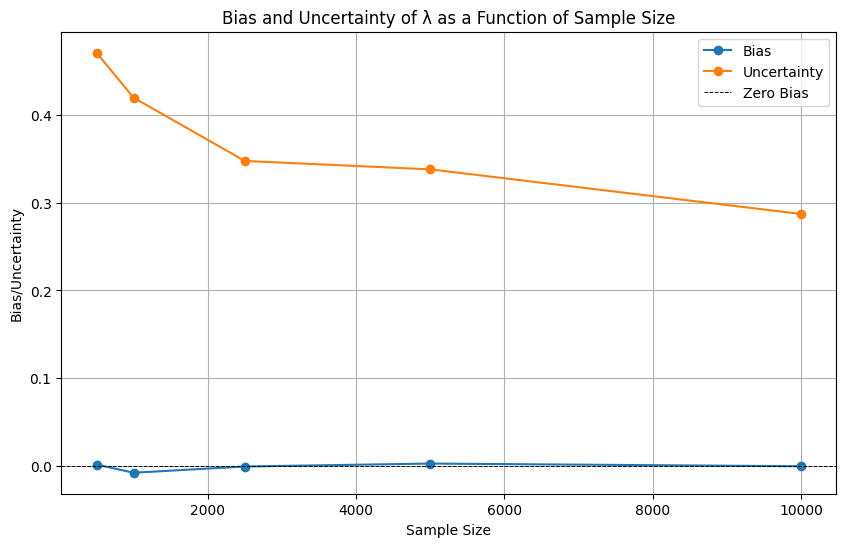

In [8]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Function to perform the bootstrap analysis
def bootstrap_study(params, sample_sizes, n_bootstraps=25, bounds=None):
    """
    Perform a bootstrap study to analyze the bias and uncertainty of fitted parameters.

    Parameters:
    - params: True parameter values for generating samples.
    - sample_sizes: List of sample sizes to test.
    - n_bootstraps: Number of bootstrap iterations per sample size.
    - bounds: Static bounds for all parameters except mu_total.

    Returns:
    - results: Dictionary containing fitted λ and its uncertainty for each sample size.
    """
    results = {size: [] for size in sample_sizes}
    true_lambda = params[4]  # True decay constant

    # Precompute PDFs
    precomputed_pdfs = precompute_pdfs(params)

    # Loop over each sample size
    for size in sample_sizes:
        for _ in range(n_bootstraps):
            # Add Poisson variation to sample size
            size_poisson = poisson.rvs(size)

            # Generate a sample
            x_samples, y_samples = parallel_generate_samples_multivariate(size_poisson, precomputed_pdfs)

            # Adjust bounds dynamically for mu_total
            dynamic_bounds = bounds[:-1] + [(0.95 * size_poisson, 1.05 * size_poisson)]

            # Perform fit without an initial guess
            fitted_params, uncertainties, success, _, _ = perform_fit(
                (x_samples, y_samples),
                dynamic_bounds  # Pass updated bounds
            )

            # Record the fitted decay constant and its uncertainty if fit was successful
            if success:
                results[size].append((fitted_params[4], uncertainties[4]))  # λ and its uncertainty

    return results


# Define static bounds for fitting
bounds = [
    (2.8, 3.2),           # mu
    (0.05, 0.5),          # sigma
    (0.5, 1.5),           # beta
    (1.0, 1.6),           # m
    (0.2, 0.4),           # lambda_s
    (-0.1, 0.1),          # mu_b
    (2.3, 2.7),           # sigma_b
    (0.1, 0.9),           # f_signal
    (None, None)          # Placeholder for dynamic mu_total bounds
]

# Define sample sizes and run the bootstrap study
sample_sizes = [500, 1000, 2500, 5000, 10000]
n_bootstraps = 25
params_true = [3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6]  # True parameters

# Run the bootstrap analysis
print("\nRunning bootstrap analysis...")
bootstrap_results = bootstrap_study(params_true, sample_sizes, n_bootstraps, bounds)

# Analyze and visualize the results
biases = []
uncertainties = []

for size in sample_sizes:
    lambdas = [result[0] for result in bootstrap_results[size]]
    lambda_uncertainties = [result[1] for result in bootstrap_results[size] if result[1] is not None]
    biases.append(np.mean(lambdas) - params_true[4])  # Calculate bias
    uncertainties.append(np.mean(lambda_uncertainties))  # Calculate average uncertainty

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, biases, marker='o', label="Bias")
plt.plot(sample_sizes, uncertainties, marker='o', label="Uncertainty")
plt.axhline(0, color='k', linestyle='--', linewidth=0.7, label="Zero Bias")
plt.xlabel("Sample Size")
plt.ylabel("Bias/Uncertainty")
plt.title("Bias and Uncertainty of λ as a Function of Sample Size")
plt.legend()
plt.grid()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.62649D+02    |proj g|=  6.57213D-01

At iterate    1    f=  6.53423D+02    |proj g|=  5.45865D-01

At iterate    2    f=  6.50356D+02    |proj g|=  5.37411D-01

At iterate    3    f=  6.48842D+02    |proj g|=  5.15904D-01

At iterate    4    f=  6.48669D+02    |proj g|=  4.96754D-01

At iterate    5    f=  6.48533D+02    |proj g|=  4.69784D-01

At iterate    6    f=  6.48329D+02    |proj g|=  4.08625D-01

At iterate    7    f=  6.48181D+02    |proj g|=  3.73796D-01

At iterate    8    f=  6.48089D+02    |proj g|=  3.85554D-01

At iterate    9    f=  6.48081D+02    |proj g|=  3.50101D-01

At iterate   10    f=  6.48080D+02    |proj g|=  3.37718D-01

At iterate   11    f=  6.48078D+02    |proj g|=  2.92857D-01

At iterate   12    f=  6.48073D+02    |proj g|=  2.81375D-01

At iterate   13    f=  6.4

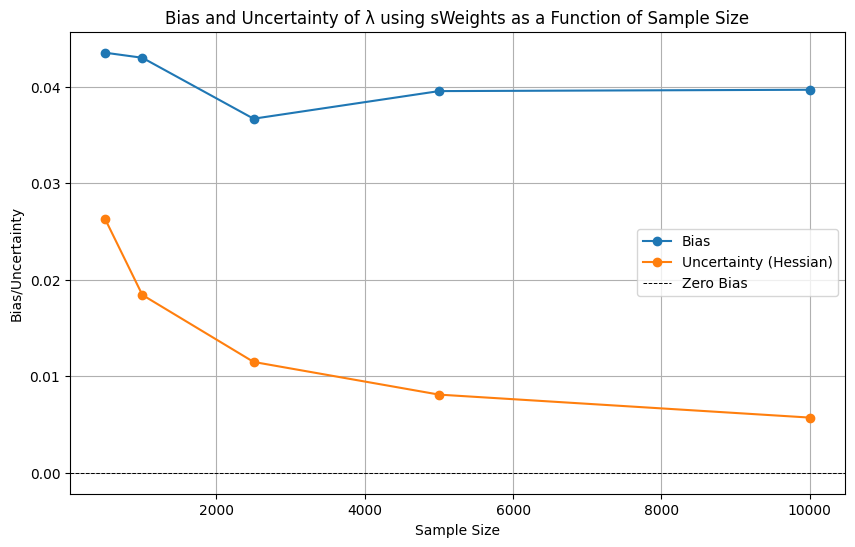

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize, minimize_scalar
import numpy as np

# Step 1: Fit only X-dimension (marginal PDF in X)
def perform_fit_for_x_only(x_samples, bounds_x):
    """
    Perform an extended maximum likelihood fit to the X-variable only without a predefined initial guess.
    """
    n_events = len(x_samples)

    # Define the negative log-likelihood function for X only
    def negative_log_likelihood_x(params):
        mu, sigma, beta, m, f_signal = params[:5]
        
        # Compute g_s normalization for current parameters
        g_s_norm = crystal_ball_normalization_truncated(mu, sigma, beta, m, lower=0, upper=5)
        
        # Evaluate g_s(X) and g_b(X)
        g_s_vals = g_s_vectorized(x_samples, mu, sigma, beta, m, g_s_norm)
        g_b_vals = g_b_vectorized(x_samples)
        
        # Combined PDF
        f_x_vals = f_signal * g_s_vals + (1 - f_signal) * g_b_vals
        
        # Clamp values for numerical stability
        f_x_vals_safe = np.maximum(f_x_vals, 1e-8)
        
        # Compute the negative log-likelihood
        return -np.sum(np.log(f_x_vals_safe))

    # Dynamically generate an initial guess within the bounds
    initial_guess = [np.random.uniform(low, high) for low, high in bounds_x]

    # Minimize the negative log-likelihood
    result = minimize(
        negative_log_likelihood_x,
        initial_guess,
        method="L-BFGS-B",
        bounds=bounds_x,
        options={'ftol': 1e-6, 'gtol': 1e-6, 'disp': True}
    )

    # Check success and return results
    if not result.success:
        raise RuntimeError("Fit for X failed!")

    return result.x  # Return fitted parameters for X only

# Step 2: Compute sWeights
def compute_sweights(x_samples, fitted_params_x, g_s_norm):
    # Extract fitted parameters for signal and background
    mu, sigma, beta, m, f_signal = fitted_params_x
    
    # Compute signal and background PDFs for X
    g_s_vals = g_s_vectorized(x_samples, mu, sigma, beta, m, g_s_norm)
    g_b_vals = g_b_vectorized(x_samples)
    
    # Calculate signal weights
    weights_signal = f_signal * g_s_vals / (f_signal * g_s_vals + (1 - f_signal) * g_b_vals)
    return weights_signal

# Step 3: Fit Y-dimension using sWeights with Hessian-based uncertainty
def fit_y_with_sweights(y_samples, sweights):
    def nll_lambda(lambda_s):
        # Weighted negative log-likelihood for Y
        h_s_vals = h_s_vectorized(y_samples, lambda_s)
        likelihood = sweights * np.log(np.maximum(h_s_vals, 1e-8))
        return -np.sum(likelihood)
    
    # Minimize the NLL to estimate lambda
    result = minimize_scalar(nll_lambda, bounds=(0.2, 0.4), method='bounded')
    lambda_mle = result.x

    # Calculate the Hessian (second derivative) at the MLE estimate
    hessian = (nll_lambda(lambda_mle + 1e-5) - 2 * nll_lambda(lambda_mle) + nll_lambda(lambda_mle - 1e-5)) / (1e-5 ** 2)
    
    # Uncertainty from Fisher Information
    uncertainty = np.sqrt(1 / hessian) if hessian > 0 else None
    
    return lambda_mle, uncertainty, result.success

# Step 4: Perform the sWeights bootstrap study
def sweights_bootstrap_study(params, sample_sizes, n_bootstraps=25):
    results = {size: [] for size in sample_sizes}
    true_lambda = params[4]
    
    # Precompute PDFs for the true parameters
    precomputed_pdfs = precompute_pdfs(params)
    
    for size in sample_sizes:
        for _ in range(n_bootstraps):
            # Add Poisson variation to the sample size
            size_poisson = poisson.rvs(size)
            
            # Generate a sample
            x_samples, y_samples = parallel_generate_samples_multivariate(size_poisson, precomputed_pdfs)
            
            # Step 1: Fit only X-dimension
            bounds_x = [
                (2.8, 3.2),    # mu
                (0.05, 0.5),   # sigma
                (0.5, 1.5),    # beta
                (1.0, 1.6),    # m
                (0.1, 0.9),    # f_signal
            ]
            fitted_params_x = perform_fit_for_x_only(x_samples, bounds_x)
            
            # Step 2: Compute sWeights
            mu, sigma, beta, m, f_signal = fitted_params_x
            g_s_norm = crystal_ball_normalization_truncated(mu, sigma, beta, m, lower=0, upper=5)
            sweights = compute_sweights(x_samples, fitted_params_x, g_s_norm)
            
            # Step 3: Fit Y-dimension using sWeights
            lambda_fit, uncertainty, success = fit_y_with_sweights(y_samples, sweights)
            if success:
                results[size].append((lambda_fit, uncertainty))
    
    return results

# Step 5: Define sample sizes and perform the sWeights bootstrap study
sample_sizes = [500, 1000, 2500, 5000, 10000]
n_bootstraps = 25
params_true = [3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6]

sweights_results = sweights_bootstrap_study(params_true, sample_sizes)

# Step 6: Analyze and plot the results
biases = []
uncertainties = []

for size in sample_sizes:
    lambdas = [result[0] for result in sweights_results[size]]
    lambda_uncertainties = [result[1] for result in sweights_results[size] if result[1] is not None]
    biases.append(np.mean(lambdas) - params_true[4])  # True lambda is params_true[4]
    uncertainties.append(np.mean(lambda_uncertainties))  # Mean uncertainty from Fisher Information

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, biases, marker='o', label="Bias")
plt.plot(sample_sizes, uncertainties, marker='o', label="Uncertainty (Hessian)")
plt.axhline(0, color='k', linestyle='--', linewidth=0.7, label="Zero Bias")
plt.xlabel("Sample Size")
plt.ylabel("Bias/Uncertainty")
plt.title("Bias and Uncertainty of λ using sWeights as a Function of Sample Size")
plt.legend()
plt.grid()
plt.show()
